In [220]:
!pip3 install plotly
!pip3 install seaborn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python3.10 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [221]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [222]:
def load_dataset(data):
    df = pd.read_csv(data)
    df.drop_duplicates(inplace=True)
    return df

In [ ]:
df = load_dataset('dataset/googleplaystore.csv')

In [224]:
def print_summarize_dataset(df):
    shapes = df.shape
    first_lines = df.head(10)
    statitsdic_df = df.describe()
    return f"its shape: {shapes}\n\nits 10 first lines: \n{first_lines}\n\n\nits statistical summary:\n{statitsdic_df}"

In [225]:
print(print_summarize_dataset(df))

its shape: (10358, 13)

its 10 first lines: 
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
5                         Paper flowers instructions  ART_AND_DESIGN     4.4   
6            Smoke Effect Photo Maker - Smoke Editor  ART_AND_DESIGN     3.8   
7                                   Infinite Painter  ART_AND_DESIGN     4.1   
8                               Garden Coloring Book  ART_AND_DESIGN     4.4   
9                      Kids Paint Free - Drawing Fun  ART_AND_DESIGN     4.7   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M

## Data Cleaning

In [228]:
def clean_dataset(dataset):
    # droping the duplicated apps from the data.
    dataset.drop_duplicates(subset='App', inplace=True) 
    
    # cleaning Installs
    # removing free apps
     # converting installs column to intger type.
    dataset.Installs = dataset.Installs.str.replace('+', '').str.replace(',', '')
    dataset = dataset[dataset['Installs'] != 'Free']
    dataset.Installs = dataset.Installs.astype(int)
    
    # cleaning Size
    # replacing 'Varies with device' sizes to 'NaN'.
    # removing M from size items if the size was by megabytes.
    # converting sizes column to float type.
    dataset['Size'] = dataset['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x) 
    dataset.Size = dataset.Size.str.replace('M', '').str.replace('Varies with device', 'NaN').str.replace(',', '').astype(float)

    # cleaning Price 
    # removing $ sing from price items.
    # converting prices column to float type.
    dataset.Price = dataset.Price.str.replace('$', '').astype('float')

    # cleaning Reviews
     # converting installs column to intger type.
    dataset['Reviews'] = dataset['Reviews'].astype('int')
    
    # balancing or normalizing
    dataset['Popularity'] = (dataset.Rating*10**7 * dataset.Reviews*10**2 * dataset.Installs)/10**18 
    
    # dropping needless columns.
    dataset.drop(['Current Ver', 'Android Ver'], axis=1, inplace=True)
    return dataset

In [229]:
df2 = clean_dataset(df)

In [230]:
df2.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Popularity
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",0.006519
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",1.885650
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",2056.485000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",48519.900000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",0.415810
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",0.036740
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.0,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",0.033820
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29.0,1000000,Free,0.0,Everyone,Art & Design,"June 14, 2018",150.941500
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.0,1000000,Free,0.0,Everyone,Art & Design,"September 20, 2017",60.680400
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,10000,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",0.005687


In [231]:
print('The original state of the data')
print(df.dtypes)

The original state of the data
App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [232]:
print('Clear data status')
print(df2.dtypes)

Clear data status
App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Popularity        float64
dtype: object


In [233]:
def compute_correlations_matrix(dataset):
    plt.figure(figsize=(10, 10))
    sns.heatmap(dataset.corr(), annot=True, cmap="YlOrRd", linewidths=0.1, annot_kws={"fontsize":10})
    plt.title("Correlation house prices - return rate")
    return plt.show()

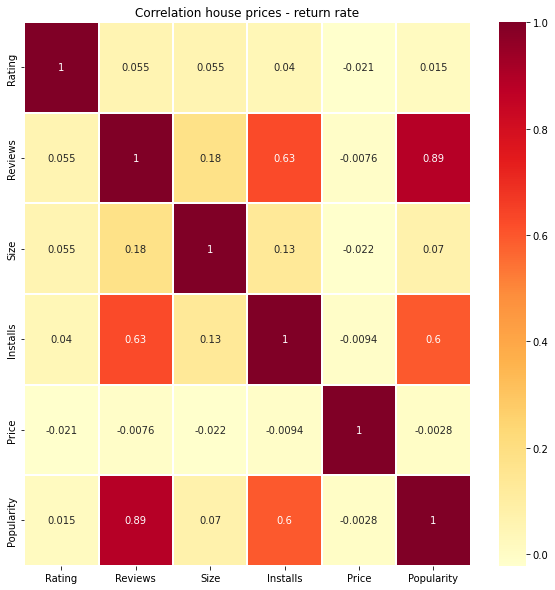

In [234]:
compute_correlations_matrix(df2)

In [235]:
def print_histograms(x,color = None,data=df2, log = False,  nbins=None ):
    fig = px.histogram(data, x=x, color=color, log_y=log,  nbins= nbins )
    fig.update_layout(width=950, height=600,)
    return fig.show()


In [236]:
def print_scatter_matrix(cols, color = None, data = df2):
    fig = px.scatter_matrix(data,
            dimensions=cols,
            color=color, symbol=color)
    fig.update_layout(autosize=False, width=950, height=600)
    return fig.show()

In [237]:
class My_visualization():
    def __init__(self, data) -> None:
        df2 = data
    def most_frequent(self, col, data = df2): # a function that counts the number of video game releases by some feature.
        d = data[col].value_counts().to_frame().reset_index().head(20).rename(columns = {col : 'Count','index' : col}) # grouping the dataset by a givin feature.
        fig = px.bar(d ,x=col, y='Count', barmode='group', color='Count', color_continuous_scale='plotly3_r') # ploting a Plotly bar chart that shows the number of releases.
        fig.update_layout(autosize=False, width=950, height=600, xaxis_title=col,
                        yaxis_title="Count") # formating.
        fig.show()
        
    def dist(self, x,color = None,data=df2, log = False,  nbins=None ): # a function to get hte distripution.
        print(f'Average app {x} = {round(data[x].mean(),2)}')
        print(f'Most frequent app {x} = {round(data[x].mode()[0],2)}')
        fig = px.histogram(data, x=x, color=color, log_y=log,  nbins= nbins )
        fig.update_layout(width=950, height=600,)
        fig.show()

    def most_app(self, by, data = df2, col = 'App', n = 20): # a function get the top apps of some column.
        d = data[[col,by]].sort_values(by=by, ascending = False).head(n)
        fig = px.bar(d ,x=col, y=by, barmode='group', color=by, color_continuous_scale='plotly3_r') # ploting a Plotly bar chart that shows the number of releases.
        fig.update_layout(autosize=False, width=950, height=600, xaxis_title=col,
                        yaxis_title=by) # formating.
        fig.show()
        
    def most_by(self, col, by, data = df2): # a function gets the top items of some columns to another column.
        d = data[[col,by]].groupby(col).mean().sort_values(by=by, ascending = False)
        fig = px.bar(d ,x=d.index, y=by, barmode='group', color=by, color_continuous_scale='plotly3_r') # ploting a Plotly bar chart that shows the number of releases.
        fig.update_layout(autosize=False, width=950, height=600, xaxis_title=col,
                        yaxis_title=by) # formating.
        fig.show()
        
    def most_for_each(self, col, x, min_val=0 ,data = df2): # a function that counts the number of video game releases for some feature to another.
        d = data.groupby([col,x]).size().to_frame().reset_index().rename(columns = {0 : 'Releasing Count'}) # grouping the dataset by two givin features.
        fig = px.histogram(d[d['Releasing Count'] > min_val] ,x=x, y='Releasing Count',
                    color=col, barmode='group') # ploting a Plotly histogram chart that shows the number of releases for some feature to each item in another feature.
        fig.update_layout(autosize=False, width=950, height=600, xaxis_title=x,
                        yaxis_title="Count") # formating.
        fig.show()
        
    def relations(self, cols, color = None, data = df2): # a function plots the relationships between some columns.
        fig = px.scatter_matrix(data,
            dimensions=cols,
            color=color, symbol=color)
        fig.update_layout(autosize=False, width=950, height=600)
        fig.show()
        
    def give_me_tops(self, col,data = df2, top = 10, by = None): # a function that gives the top frequent names in some feature.
        if not by:
            return data.groupby(col).size().sort_values(ascending=False).head(top).index
        else:
            tops = []
            for u in data[by].unique():
                tops += data[data[by]==u].groupby(col).size().sort_values(ascending=False).head(top).index.to_list()
            return tops
        
    def precentages(self, cols,tops, data = df2): # a function plots the precentages of some columns to others.
        grouped = data[cols].groupby(cols).size().sort_values(ascending = False).reset_index()
        list_of_groups = []
        for col,top in zip(cols[:-1],tops):
            for unique in data[col].unique():
                list_of_groups.append(grouped[grouped[col] == unique].head(top))
        grouped_t_c = pd.concat(list_of_groups)
        
        fig = px.sunburst(grouped_t_c, path=cols, values = 0)
        
        fig.update_layout(autosize=False, width=950, height=600)
        fig.show()
        
    def most_comp(self, column, sep = ';', top = 10): # a function to count the repetition that takes the columns to get the repetition of each item in it.
        
        column = column.str.split(sep) #insteed of a string seprated by (|) I prefer to make it a Numpy array.
        
        unique = set() # a set called unique to store unique items because sets don't allow repetition.
        Rep_dict = {} # a dictionary to store unique items names as keys and how much they were in the column as value.

        for lst in column: # looping for each list in the given column.
            for item in lst: # nested looping for each item in each list in the given column.
                unique.add(item) # adding each item to the unique set.

        for item in unique: # looping for each item in set
            Rep_dict[item] = 0 # assigning a zero value to each item as a key in the repetition dictionary.

        for lst in column: 
            for item in lst:
                Rep_dict[item] +=1 # adding one for each time that an item appears in each list in the given column to its cumulative value in the repetition dictionary.
            
        rep_df = pd.Series(Rep_dict).to_frame() # converting the repetition dictionary to a data frame with index values of each unique item was in  the repetition dictionary.
        rep_df.reset_index(inplace=True) # reseting the index values to get the unique items to be an independent column in the data frame.
        rep_df.columns = [column.name,'Repetition'] # naming the unique items column after the given column's name and the repetition column Repetition (obviously).
        rep_df = rep_df.sort_values('Repetition',ascending=False).head(top) # sorting the data frame to give the highest repetition scores first.

        fig = px.bar(rep_df ,x='Genres', y='Repetition', barmode='group', color='Repetition', color_continuous_scale='plotly3_r') # ploting a Plotly bar chart that shows the number of releases.
        fig.update_layout(autosize=False, width=950, height=600) # formating.
        fig.show()

In [238]:
vs = My_visualization(df2)

## What is the Category of most of the applications in the store?

In [239]:
vs.most_frequent('Category')

#### <b>Answer:</b> <i>Family apps scores the most.</i>

## What is the distribution of the ratings?

In [240]:
vs.dist('Rating', 'Type')

Average app Rating = 4.17
Most frequent app Rating = 4.3


#### <b>Answer:</b> <i> most ratings lay between 4 - 4.7.</i>

## What is the average rating for each category?

In [241]:
vs.most_by('Category','Rating')

#### <b>Answer:</b> <i>Events apps scores the most.</i>

## What is the distribution of the reviews?

In [242]:
vs.dist('Reviews', 'Type', log = True, nbins = 50)

Average app Reviews = 216592.56
Most frequent app Reviews = 0


#### <b>Answer: </b><i>most apps have less than 2M reviews.</i>

## What is the most revewed category?

In [243]:
vs.most_by('Category', 'Reviews')

#### <b>Answer: </b><i>Social and communication apps got the highest numbers of reviews</i>

## Is there a relationship between rating and the number or reviews?

In [244]:
vs.relations(['Rating', "Reviews"], 'Type')

#### <b>Answer: </b><i>All apps with high number of reviews got rating more than 3.5<br>Paid apps have low number of reviews.</i>

## What is the distribution of the installs?

In [245]:
vs.dist('Installs', 'Type', log = True, nbins = 50)

Average app Installs = 7777506.73
Most frequent app Installs = 1000000


# <b>Answer: </b><i></i>

#### <b>Answer: </b><i>Most apps' installs is less that 15M.</i>

## What is the most installed categories?

In [246]:
vs.most_by('Category', 'Installs')

#### <b>Answer: </b><i>Comunication apps scores the best</i>

## How to get the most popular apps?

In [247]:
vs.dist('Popularity', 'Type', log = True, nbins = 100)

Average app Popularity = 323136.68
Most frequent app Popularity = 0.0


#### <b>Answer:</b> <i>Most apps have a popularity score less than 2.5M</i>

## Is there a relationship between rating, the number or reviews and number of installsy?

In [248]:
vs.relations(['Rating', "Reviews", 'Installs'], 'Type')

#### <b>Answer:</b> 
1. <i>All apps with ratings more than 3 have a high number of install. </i>
2. <i>APaid apps have a very low number of installs and reviews.</i>
3. <i>A All apps with Number of reviews more than 50M have a high number of installs.</i>

## What are the most popular apps?

In [249]:
vs.most_app('Popularity')

####  <b>Answer:</b> <i>Facebook, WhatsApp and Instagram scores the most.</i>

## What are the most popular categories?

In [250]:
vs.most_by('Category', 'Popularity')

#### Social and communication categories scores the most.

## How does the size of apps distributes?

In [251]:
vs.dist('Size','Type')

Average app Size = 21.17
Most frequent app Size = 11.0


#### Most apps' size is less than 10m.

## What is the largest category?

In [252]:
vs.most_by('Category', 'Size')

#### Games scores the best.

## Is there a relationship between Size and popularity?

In [253]:
vs.relations(['Size', 'Popularity'], 'Type')

## What are the top five categories for each app Type?

In [254]:
vs.precentages(['Type','Category'],[5])

In [255]:
vs.dist('Price',data = df2[df2.Type == 'Paid'], nbins = 20)

Average app Price = 14.05
Most frequent app Price = 0.99


#### Most paid app prices are less than 10 dollers.

## What are the most expensive apps?

In [256]:
vs.most_app('Price')

#### The most expencive apps are mostly called I'm Rich apps.

## What is the most expensive app category?

In [257]:
vs.most_by('Category','Price', data = df2[df2.Type == 'Paid'])

#### Finance apps scores the most.

## Is there a relationship between Price, size and popularity?

In [258]:
vs.relations(['Size', 'Popularity', 'Price'], data = df2[df2.Type == 'Paid'])

#### - Apps with size larger than 50m are cheaper.
#### - Price and popularity seems to have a weak nigative relationship.

## What is the content rating for most of the apps?

In [259]:
vs.most_frequent('Content Rating')

#### Everyone content rating scores the best.

## Now let's get more deeper with the Type, Category and Content Rating data!

In [260]:
vs.precentages(['Type','Category','Content Rating'],[4,5])

## What is the most frequent app genre?

In [261]:
vs.most_comp(df2.Genres, top = 25)

#### Tools scores the best.

## Conclusion

#### <i>The Google Play Store is the largest app market in the world.</i>
#### <i>It generates more than double the downloads of the Apple App Store, but makes only half the money as the App Store. </i>
#### <i>So, we scraped data from the Play Store to conduct research on it. </i>
#### <i>There are a couple of issues with the Play Store that we have identified from exploratory data analysis. </i>
#### <i>An inclusion of a feature that lets users notify developers if they are unsatisfied with an update could go a long into not plummeting an app with low installs to the ground. </i>
#### <i>There is also the problem of rating mismatch on a smaller scale. </i>
#### <i>If this issue could be mitigated, the Play Store would provide a more accurate representation of user sentiment which in turn could help developers make adjustments to their app accordingly. </i>
#### <i>We also defined a success parameter for an app based on the number of installs, distribution of ratings 4 and 5 relative to the overall number of ratings, installs to rating ratio, content.</i>